In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # for text encoding
from sklearn.compose import ColumnTransformer

%matplotlib inline

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

In [2]:
companies = pd.read_csv("Companies_1000.csv")

In [3]:
companies.head ()

,R&D Spend,Administration,Marketing Spend,State,States,Profit
0,165349.20,136897.80,471784.10,New York,1,192261.83
1,162597.70,151377.59,443898.53,California,2,191792.06
2,153441.51,101145.55,407934.54,Florida,3,191050.39
3,144372.41,118671.85,383199.62,New York,1,182901.99
4,142107.34,91391.77,366168.42,Florida,3,166187.94



# Assuming companies_enc is your DataFrame after one-hot encoding 'State'

# Combine the encoded columns into a unified State column
companies_enc["Unified_State"] = companies_enc[['State_California', 'State_Florida', 'State_New York']].idxmax(axis=1)

# Drop original encoded State columns
companies_enc.drop(columns=['State_California', 'State_Florida', 'State_New York'], inplace=True)

# Encode the 'Unified_State' column
label_encoder = LabelEncoder()
companies_enc['Encoded_State'] = label_encoder.fit_transform(companies_enc['Unified_State'])

# Extracting X (features) and y (target)
X = companies_enc.iloc[:, :-2].values  # Features excluding 'Unified_State' and 'Encoded_State'
y = companies_enc.iloc[:, -1].values  # Replace with the correct target column index

# Display information and correlation
print(X)  # Display X (features)
print(companies_enc.head())  # Display encoded DataFrame
print(companies_enc.info())  # Display DataFrame info

# Calculate correlations
correlation_matrix = companies_enc.corr()

# Display correlation matrix
print(correlation_matrix)




# Perform one-hot encoding on the categorical variable 'State'

# Perform one-hot encoding on the State column
companies_enc = pd.get_dummies(companies, columns=['State'])

# Combine the encoded columns into a unified State column
companies_enc["Unified_State"] = companies["State"]

# Reorder columns to have 'Unified_State' at the end
companies_enc = companies_enc[['State_California', 'State_Florida', 'State_New York', 'Unified_State']]

# Drop original encoded State columns
drops = ["State_California", "State_Florida", "State_New York"]
companies_enc.drop(columns=drops, inplace=True)

# Extracting X (features) and y (target)
X = companies.iloc[:, :-1].values  # Assuming the target column is the last one
y = companies.iloc[:, -1].values  # Replace with the correct target column index

# Display information and correlation
print(X)  # Display X (features)
print(companies_enc.head())  # Display encoded DataFrame
print(companies_enc.info())  # Display DataFrame info


# Assuming companies_enc is your DataFrame after creating 'Unified_State'

# Encode the 'Unified_State' column
label_encoder = LabelEncoder()
companies_enc['Encoded_State'] = label_encoder.fit_transform(companies_enc['Unified_State'])

# Calculate correlations
correlation_matrix = companies_enc.corr()

# Display correlation matrix
print(correlation_matrix)

print(companies_enc.corr())  # Display correlation matrix



'''
companies_enc= pd.get_dummies(companies, columns=['State']) 

companies_enc["Unified_State"] = companies["State"] # combine the supposed encoded columns representing the categories of the State.
ompanies_enc = companies_enc[['State_California', 'State_Florida', 'State_Florida'] + [col for col in companies_enc.columns if col != 'State_Florida' and col != 'State_Florida' and col != 'State_New York']]

drops =["State_California","State_Florida","State_New York"]
companies_enc.drop(columns =drops, inplace =True)


X = companies.iloc[:,:-1].values # to put all the rows in columns 1-4 in X as a numpy array
y = companies.iloc[:,3].values # to put all the rows in columns 1-4 in X as a numpy array

X

companies_enc.head() # for correlation
companies_enc.info()'''


In [4]:

# Creating a sample DataFrame

# Mapping text labels to numbers
label_mapping = {'New York': 1, 'California': 2, 'Florida': 3} # to encode the array object into nureic values

# Replacing text labels with numbers
companies['State'] = companies['State'].replace(label_mapping)

print(companies)
companies.drop(columns ="States", inplace =True)
companies.head()


     R&D Spend  Administration  Marketing Spend  State  States        Profit
0    165349.20      136897.800      471784.1000      1       1  192261.83000
1    162597.70      151377.590      443898.5300      2       2  191792.06000
2    153441.51      101145.550      407934.5400      3       3  191050.39000
3    144372.41      118671.850      383199.6200      1       1  182901.99000
4    142107.34       91391.770      366168.4200      3       3  166187.94000
..         ...             ...              ...    ...     ...           ...
995   54135.00      118451.999      173232.6695      2       2   95279.96251
996  134970.00      130390.080      329204.0228      2       2  164336.60550
997  100275.47      241926.310      227142.8200      2       2  413956.48000
998  128456.23      321652.140      281692.3200      2       2  333962.19000
999  161181.72      270939.860      295442.1700      1       1  476485.43000

[1000 rows x 6 columns]


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


In [5]:
companies.head()
companies.corr()
companies.shape
companies.info()
companies.describe()
companies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   int64  
 4   Profit           1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
companies['Profit'].astype(int) # converting Profit feature to an integer
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   int64  
 4   Profit           1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


## Data Distribution:
The below plots visualizes the data

# the charts shows that all the features are multimodal (bi-modal and more) except State,Marketing Spend

There are no outliers in the data excpet for state

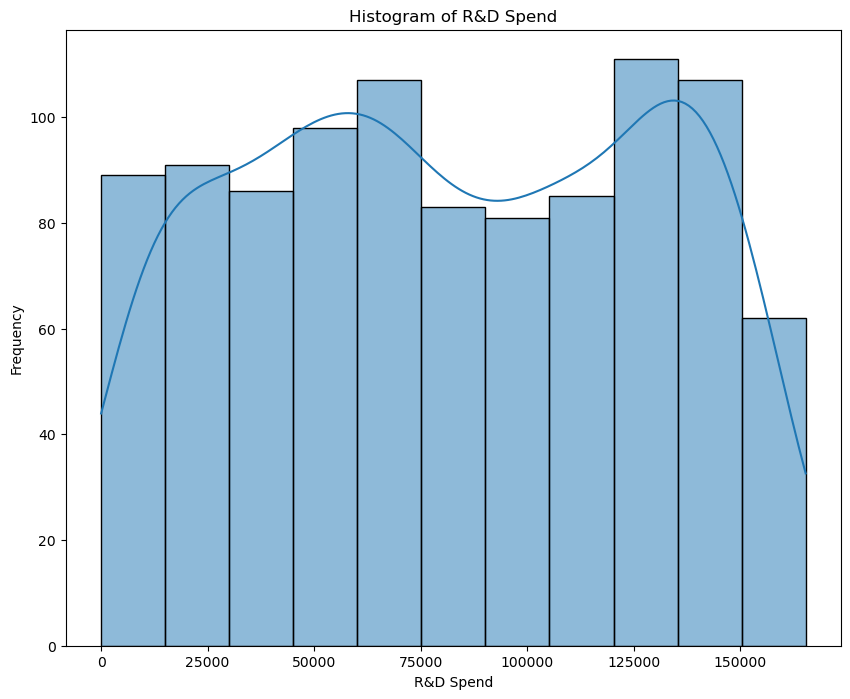

0         0.0
1     84533.0
2    153606.0
Name: R&D Spend, dtype: float64


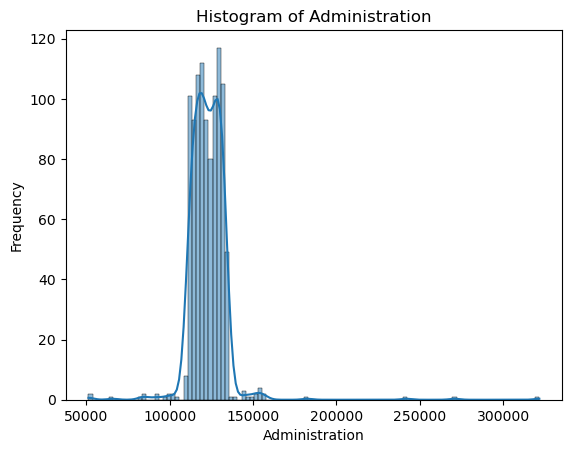

0    122941.3141
1    133142.3294
Name: Administration, dtype: float64


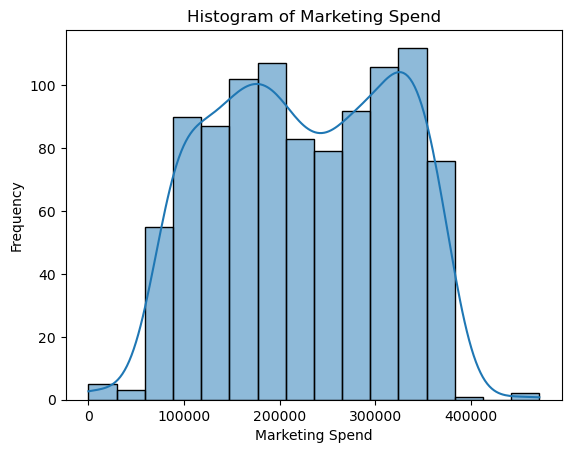

0    0.0
Name: Marketing Spend, dtype: float64


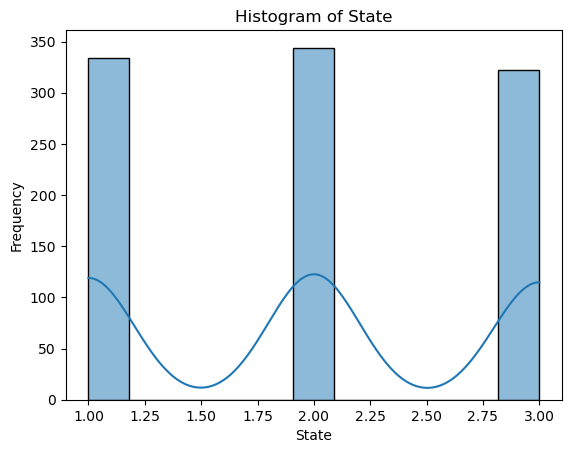

0    2
Name: State, dtype: int64


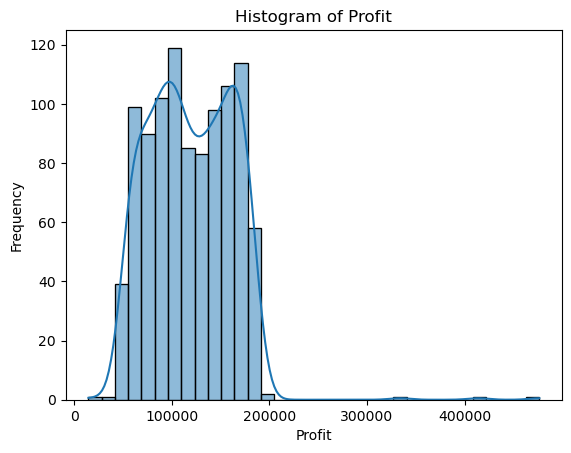

0    121248.7116
1    180257.1795
Name: Profit, dtype: float64


In [7]:
plt.figure(figsize =(10,8))

for cols in companies.columns:
    sns.histplot(data =companies, x =cols, kde =True)
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.title(f"Histogram of {cols}")

    plt.show()
    print(companies[cols].mode())

In [8]:
X = companies.iloc[:,:-1].values
y= companies.iloc[:,4]
type(X)

numpy.ndarray

In [9]:


# Assuming X is a NumPy array and you want to encode column 3
column_index_to_encode = 3

# Extracting the column you want to encode
column_to_encode = X[:, column_index_to_encode]

label_encoder = LabelEncoder()
encoded_column = label_encoder.fit_transform(column_to_encode)

# Replace the column in the original array with the encoded values
X[:, column_index_to_encode] = encoded_column

# Perform one-hot encoding on the modified column
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')  # Instantiate the OneHotEncoder
one_hot_encoded_column = one_hot_encoder.fit_transform(X[:, column_index_to_encode].reshape(-1, 1))

# Replace the original column with the one-hot encoded values
X = np.hstack((X[:, :column_index_to_encode], one_hot_encoded_column.toarray(), X[:, column_index_to_encode + 1:]))
X =X[:,1:]


Splitting into train and test set for model

In [10]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state =0)


Appllying Linear Regression for buliding the model

In [11]:
model = LinearRegression()

# fitting the model
model.fit(X_train,y_train)

LinearRegression()

testing the model

In [12]:
y_pred = model.predict(X_test)
print(y_pred[:6]) # to see the first 6 rows
print(y[:6])

[ 90565.4549183   89231.66013825  95558.1615789  173980.70753521
  84392.40760654 110960.02030434]
0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
5    156991.12
Name: Profit, dtype: float64


In [13]:
modelCoef = model.coef_
modelIntercept = model.intercept_
# print(f"The Linear regression coefficients of the model is: {modelCoef :.3f}\n The Intercept is {modelIntercept :.3f}")

print(f"The Linear regression coefficients of the model are:\n R&D: {modelCoef[0]:.3f}\n Administration: {modelCoef[1]:.3f} \n Marketing : {modelCoef[2]:.2f} \n State: {modelCoef[3]:.3f}")

print(f"The Intercept is: {modelIntercept:.3f}")  # Assuming modelIntercept is a single value


The Linear regression coefficients of the model are:
 R&D: 1.041
 Administration: 0.355 
 Marketing : 76.63 
 State: 692.903
The Intercept is: -88812.353


##The model equation is: 


profit = -88812.353 + 1.041*RD + 0.355*Admin + 76.63*Mkt + 692.903*St


where RD = R&D Spend


Admin =Administration

Mkt = Marketing Spend

St = State/City

 Lets Now Evaluate the performance of the model

In [14]:
from sklearn.metrics import r2_score as rs
rs(y_test,y_pred) 
# R squred shows the model performance is very poor.


0.898228254958607

Let us imporve the model now by droping the State Feature because of its outragious outliers

In [17]:

column_to_drop = 3  # Index of the column you want to drop

# Dropping the State column
# X_without_column = np.delete(X, column_to_drop, axis=1)

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state =0)


model = LinearRegression()

# fitting the model
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(y_pred[:6]) # to see the first 6 rows
print(y[:6])

modelCoef = model.coef_
modelIntercept = model.intercept_
# print(f"The Linear regression coefficients of the model is: {modelCoef :.3f}\n The Intercept is {modelIntercept :.3f}")

print(f"The Linear regression coefficients of the model are:\n R&D: {modelCoef[0]:.3f}\n Administration: {modelCoef[1]:.3f} \n Marketing : {modelCoef[2]:.2f} \n State: {modelCoef[3]:.3f}")

print(f"The Intercept is: {modelIntercept:.3f}")  # Assuming modelIntercept is a single value

print(f"The R squared value is :{rs(y_test,y_pred)*100}")

[ 90565.4549183   89231.66013825  95558.1615789  173980.70753521
  84392.40760654 110960.02030434]
0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
5    156991.12
Name: Profit, dtype: float64
The Linear regression coefficients of the model are:
 R&D: 1.041
 Administration: 0.355 
 Marketing : 76.63 
 State: 692.903
The Intercept is: -88812.353
The R squared value is :89.8228254958607


from sklearn.metrics import confusion_matrix

# Assuming you've transformed the regression problem into a classification problem
# and obtained predicted classes
predicted_classes = model.predict(X_test)  # Replace 'model' with your linear regression model

# Convert predicted continuous values to classes based on a threshold
threshold = 0.5  # For example
predicted_classes = (predicted_classes > threshold).astype(int)

# Assuming true_classes are the actual classes or labels
# Create a confusion matrix
true_classes = y_test  # Provide the true classes or labels
conf_matrix = confusion_matrix(true_classes, predicted_classes)

print("Confusion Matrix:")
print(conf_matrix)
